## **Task 4: Stock Market Prediction using Numerical and Textual Analysis**
---



Objective: Create a hybrid model for stock price/performances prediction using numerical analysis of hiatorical stock prices and sentiment analysis of news headline

Work: In this project I used 2 dataset first one is News Headline and other one is historical Stock Price .

On first dataset I perform a ***Sentiment Analysis*** on our News Headline dataset and make a one sentiment column with the help of compound of sentiments. Then also apply a ***Topic Modeling*** on the news healines.

On second dataset I have applied a LSTM Model and try to predict the closing price of the SENSEX using the last 100 days data in LSTM to predict the next 30 days closing price and plot on the graph.   

Author : Sachin Yadav

In [1]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings('ignore')                             
from datetime import datetime
import math
import numpy as np

In [65]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving india-news-headlines.csv to india-news-headlines (1).csv
User uploaded file "india-news-headlines.csv" with length 237855132 bytes


In [67]:
path ='C:/Users/admin/Documents/GRIP Internship/Task 4 (Stock market prediction using numerical and texual analysis)/india-news-headlines.csv'
# dateparse = lambda date: pd.datetime.strptime(date, '%Y-%m-%d')
lastconnection = lambda date: pd.datetime.strptime(date, '%Y%m%d').strftime('%Y-%m-%d')

news = pd.read_csv('india-news-headlines.csv', parse_dates=['publish_date'], date_parser=lastconnection)


In [68]:
news.shape

(143867, 3)

In [69]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [70]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143867 entries, 0 to 143866
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   publish_date       143867 non-null  datetime64[ns]
 1   headline_category  143866 non-null  object        
 2   headline_text      143866 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.3+ MB


In [71]:
print('Shape of the dataset', news.shape)

Shape of the dataset (143867, 3)


In [72]:
news_df = news[news['publish_date'] > '2015-01-01']
news_df.shape

(0, 3)

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ^BSESN.csv to ^BSESN.csv
User uploaded file "^BSESN.csv" with length 378365 bytes


In [5]:
stock = pd.read_csv('^BSESN.csv', parse_dates=['Date'])
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-01,3637.030029,3651.320068,3555.739990,3557.639893,3557.639893,0.0
1,2001-06-04,3565.879883,3590.560059,3490.830078,3498.379883,3498.379883,0.0
2,2001-06-05,3495.989990,3510.679932,3434.879883,3460.040039,3460.040039,0.0
3,2001-06-06,3473.320068,3507.239990,3448.439941,3457.310059,3457.310059,0.0
4,2001-06-07,3455.860107,3459.510010,3395.520020,3457.239990,3457.239990,0.0
5,2001-06-08,3466.659912,3502.780029,3452.939941,3495.840088,3495.840088,0.0
6,2001-06-11,3507.340088,3525.040039,3482.800049,3509.320068,3509.320068,0.0
7,2001-06-12,3504.239990,3517.360107,3484.080078,3498.389893,3498.389893,0.0
8,2001-06-13,3499.320068,3519.129883,3492.949951,3501.610107,3501.610107,0.0
9,2001-06-14,3491.360107,3501.500000,3446.959961,3453.770020,3453.770020,0.0


In [8]:
# stock['Date'] = stock['Date'].astype('datetime64[ns]')
stock_df = stock[stock['Date'] > '2015-01-01']
stock_df.set_index('Date', inplace=True)
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0


In [9]:
print(stock.shape)
print(stock_df.shape)

stock_df.tail(10)

(4760, 7)
(1350, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-16,33853.718750,34022.011719,32953.300781,33605.218750,33605.218750,27400.0
2020-06-17,33438.308594,33933.660156,33332.960938,33507.921875,33507.921875,20200.0
2020-06-18,33371.519531,34276.011719,33371.519531,34208.050781,34208.050781,21200.0
2020-06-19,34335.378906,34848.371094,34136.390625,34731.730469,34731.730469,27900.0
2020-06-22,34892.031250,35213.519531,34794.398438,34911.320313,34911.320313,25100.0
2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0


In [10]:
# stock_df.style.format({"Date": lambda t: t.strftime("%d/%m/%Y")})
# stock_df.head()

In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4760 non-null   datetime64[ns]
 1   Open       4691 non-null   float64       
 2   High       4691 non-null   float64       
 3   Low        4691 non-null   float64       
 4   Close      4691 non-null   float64       
 5   Adj Close  4691 non-null   float64       
 6   Volume     4691 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 260.4 KB


In [12]:
stock_df.dropna(inplace=True)

# check the null values 
stock_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Text  Preprocessing 

In [73]:
news_df = news.iloc[:10000,:]
news_df.shape

(10000, 3)

In [74]:
len(news_df.publish_date)

10000

In [75]:
news_df.headline_category.unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', 'india',
       'city.bengaluru', 'city.patna', 'business.india-business',
       'entertainment.english.hollywood', 'city.delhi', 'edit-page',
       'sports.cricket.india-domestic.ranji-trophy', 'sports.football',
       'only-in-america', 'city.ahmedabad', 'jugular-vein', 'swaminomics',
       'city.thiruvananthapuram', 'city.pune', 'home.science',
       'city.mumbai', 'city.chandigarh', 'city.lucknow', 'city.kolkata',
       'city.hyderabad', 'cricket', 'business.international-business',
       'city', 'removed', 'home.sunday-times.deep-focus', 'bombay-times'],
      dtype=object)

In [76]:
news_df.headline_text[:10]

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya; s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India?
4                   For bigwigs; it is destination Goa
5                 Extra buses to clear tourist traffic
6          Dilute the power of transfers; says Riberio
7                    Focus shifts to teaching of Hindi
8                 IT will become compulsory in schools
9        Move to stop freedom fighters' pension flayed
Name: headline_text, dtype: object

In [77]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus = []
for i in range(0,10000):
    headline = re.sub('[^a-zA-Z]', ' ',news_df['headline_text'][i])
    headline = headline.lower()
    headline = headline.split()
#     ps = PorterStemmer()
#     headline = [ps.stem(word) for word in headline if not word in set(stopwords.words('english'))]
    headline = ' '.join(headline)
    corpus.append(headline)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [78]:
corpus[:4]

['win over cena satisfying but defeating undertaker bigger roman reigns',
 'status quo will not be disturbed at ayodhya says vajpayee',
 'fissures in hurriyat over pak visit',
 'america s unwanted heading for india']

In [79]:
news_df['clean_headline'] = corpus

In [80]:
news_df.head()

,publish_date,headline_category,headline_text,clean_headline
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa


## Check the Sentiments of the news

In [87]:
!pip install vaderSentiment
# $ pip install --upgrade vaderSentiment

     |████████████████████████████████| 133kB 7.8MB/s 


In [88]:
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
std = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [89]:
# Check the output with an example
a = 'I like to stand here'
std.polarity_scores(a)

{'compound': 0.3612, 'neg': 0.0, 'neu': 0.615, 'pos': 0.385}

In [90]:
# check the polarity for headline on index '0'
std.polarity_scores(news_df.loc[0]['clean_headline'])

{'compound': -0.0, 'neg': 0.23, 'neu': 0.473, 'pos': 0.297}

In [91]:
news_df['score'] = news_df['clean_headline'].apply(lambda clean_headline: std.polarity_scores(clean_headline))
news_df.head()

,publish_date,headline_category,headline_text,clean_headline,score
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...,"{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'com..."
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp..."
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [93]:
news_df['compound']= news_df['score'].apply(lambda score_dict: score_dict['compound'])
news_df.head()

,publish_date,headline_category,headline_text,clean_headline,score,compound
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...,"{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'com...",-0.0000
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.2924
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


Compound is computed by normalizing the score of Positive negative and neutral.

So, Now on the basis of compound we will find postive and negative headline(<0.5 means positive and >0.5 is negative).

In [94]:
# Add sentiment reviews in new column
news_df['comp_score']= news_df['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
news_df.head()

,publish_date,headline_category,headline_text,clean_headline,score,compound,comp_score
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,win over cena satisfying but defeating underta...,"{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'com...",-0.0000,pos
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.2924,pos
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263,neg
4,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


# Topic modeling uisng LDA

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

Parameters we will use in CountVectorizer means:

min_df : When building the vocabulary ignore terms that have a document
    frequency strictly lower than the given threshold. This value is also
    called cut-off in the literature.
    
max_df : When building the vocabulary ignore terms that have a document
    frequency strictly higher than the given threshold (corpus-specific
    stop words).

In [96]:
cv = CountVectorizer(max_df= 0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(news_df['clean_headline'])
dtm

<10000x5929 sparse matrix of type '<class 'numpy.int64'>'
	with 38880 stored elements in Compressed Sparse Row format>

In [97]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis(n_components=7, randoms_state=51)
# ldaa.fit(dtm)

In [98]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7, random_state=51)
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=51, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

## Three Steps Away...
Grab the vocab, Grab the topic, and finally grab the highest prob. word per topic

In [100]:
print(len(cv.get_feature_names()))
type(cv.get_feature_names())

5929


list

In [101]:
cv.get_feature_names()[5004]

'squatting'

In [102]:
import random

for i in range(10):
    randomm_word_id = random.randint(0, 5928)
    print(cv.get_feature_names()[randomm_word_id])

consultant
flip
sony
technology
teachers
burst
bogies
wants
winners
tyagi


## Showing top words per topic

In [103]:
print(len(lda.components_))
lda.components_.shape

7


(7, 5929)

In [104]:
print(lda.components_)
print('Length of the each row of an array:',len(lda.components_[0]))

[[ 0.14285728  0.14285721  0.14285743 ...  0.14285778  2.49512879
   0.14285722]
 [ 0.14297605  0.14285721  0.14312174 ...  3.14347442  2.65545367
   0.14285723]
 [ 0.14285728  0.14285721  1.14284736 ...  0.14296576  0.14285756
   0.14285722]
 ...
 [ 0.14285728  0.14285721  1.14260109 ...  1.1414598   2.14178078
   0.14285722]
 [ 0.14285729  2.14285673  0.14285747 ...  0.14285786  0.1428576
   0.14285723]
 [15.14273755  0.14285722  0.14285747 ...  0.14352659  0.14325617
   2.14285666]]
Length of the each row of an array: 5929


In [105]:
single_topic = lda.components_[0]

# Returns the indices that would sort this array
single_topic.argsort() #Returns the index of after sorting array values in ascending order

array([2168, 4280,  945, ..., 3545, 2219,  560])

In [106]:
# Word least representative of this  topic
single_topic[4280]

0.142857194500235

In [107]:
# Top 10 words for this topic
top_word_indices =single_topic.argsort()[-10:]

In [108]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

year
panel
seeks
centre
congress
cong
bangalore
new
govt
bjp


It's look like political news regarding to new Govt. formation

In [109]:
# Display the Top 15 words of each topic using argsort() method
for index, topic in enumerate(lda.components_):
    print(f"THE TOP 15 WORDS FOT TOPIC #{index}")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')
    

THE TOP 15 WORDS FOT TOPIC #0
['help', 'police', 'stage', 'cases', 'plan', 'year', 'panel', 'seeks', 'centre', 'congress', 'cong', 'bangalore', 'new', 'govt', 'bjp']


THE TOP 15 WORDS FOT TOPIC #1
['phoolan', 'music', 'militants', 'murder', 'says', 'hrithik', 'plans', 'time', 'work', 'death', 'big', 'hc', 'killed', 'man', 'held']


THE TOP 15 WORDS FOT TOPIC #2
['day', 'doctors', 'india', 'team', 'talks', 'colleges', 'police', 'manipur', 'ceasefire', 'students', 'say', 'takes', 'indian', 'new', 'govt']


THE TOP 15 WORDS FOT TOPIC #3
['chief', 'don', 'best', 'tech', 'old', 'hit', 'quake', 'soon', 'high', 'tax', 'new', 'goa', 'power', 'police', 'india']


THE TOP 15 WORDS FOT TOPIC #4
['industry', 'cabinet', 'road', 'centre', 'officers', 'injured', 'sonia', 'cong', 'says', 'probe', 'sc', 'issue', 'gets', 'cm', 'govt']


THE TOP 15 WORDS FOT TOPIC #5
['food', 'shah', 'indian', 'new', 'court', 'case', 'chief', 'women', 'pm', 'musharraf', 'jaya', 'net', 'indo', 'minister', 'pak']


THE TO

## Attaching Discovered Topic Labels to Original articles

In [110]:
dtm

<10000x5929 sparse matrix of type '<class 'numpy.int64'>'
	with 38880 stored elements in Compressed Sparse Row format>

In [111]:
# len(npr)
dtm.shape

(10000, 5929)

In [112]:
topic_results = lda.transform(dtm)
topic_results.shape

(10000, 7)

In [113]:
topic_results[0] # Returns the probabilty of topics for our first row

array([0.02380958, 0.02380959, 0.85695008, 0.02392352, 0.02386358,
       0.02380959, 0.02383405])

In [114]:
topic_results[0].round(2)

array([0.02, 0.02, 0.86, 0.02, 0.02, 0.02, 0.02])

In [115]:
# Apply argmax() method to returm the index value or max value present in above array
# for above array max value is 0.86 i.e., argmax return us '2' because it's its index value
topic_results[0].argmax()

2

This means that our model thinks that the first headliine belongs to topic #2

In [116]:
npr = pd.DataFrame(news_df.iloc[:,3])

npr.head()

,clean_headline
0,win over cena satisfying but defeating underta...
1,status quo will not be disturbed at ayodhya sa...
2,fissures in hurriyat over pak visit
3,america s unwanted heading for india
4,for bigwigs it is destination goa


In [117]:
topic_results.argmax(axis=1)

array([2, 3, 2, ..., 4, 1, 4])

In [118]:
# Apply Topic modeling on our headlines
npr['Topic'] = topic_results.argmax(axis=1)

In [119]:
npr.head()

,clean_headline,Topic
0,win over cena satisfying but defeating underta...,2
1,status quo will not be disturbed at ayodhya sa...,3
2,fissures in hurriyat over pak visit,2
3,america s unwanted heading for india,3
4,for bigwigs it is destination goa,5


Other than LDA we can also apply Non Negative Matrix Factorization method for Topic Modelling.

Now, we can merge  topic column in our original dataset. 

In [120]:
news_df = news_df.drop(['headline_category', 'headline_text', 'score', 'compound'], axis=1)

In [121]:
news_df['topic'] = npr.Topic.values
news_df.head()

,publish_date,clean_headline,comp_score,topic
0,2001-01-01,win over cena satisfying but defeating underta...,pos,2
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,pos,3
2,2001-01-02,fissures in hurriyat over pak visit,pos,2
3,2001-01-02,america s unwanted heading for india,neg,3
4,2001-01-02,for bigwigs it is destination goa,pos,5


In [122]:
news_df.topic.value_counts()

0    1600
4    1489
2    1457
3    1418
1    1410
6    1378
5    1248
Name: topic, dtype: int64

***By this we check sentiment analysis and also apply Topic Modeling on our dataset.***

## ***## Time series forecasting with stock price of SENSEX dataset***

___DESCRIPTION: By the use of Artificial Neural Networks called Long Short Term Memory(LSTM) to predict the closeing stock price of a SENSEX.___

In [123]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,label,Label
Date,,,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0,366.621094,366.621094
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0,-136.109375,-136.109375
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0,-706.769531,-706.769531
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0,-74.609375,-74.609375
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0,95.941407,95.941407


__By comparing Open and Closed market points we can make column of UP and DOWN of Stock price on which we can train our model.__ 


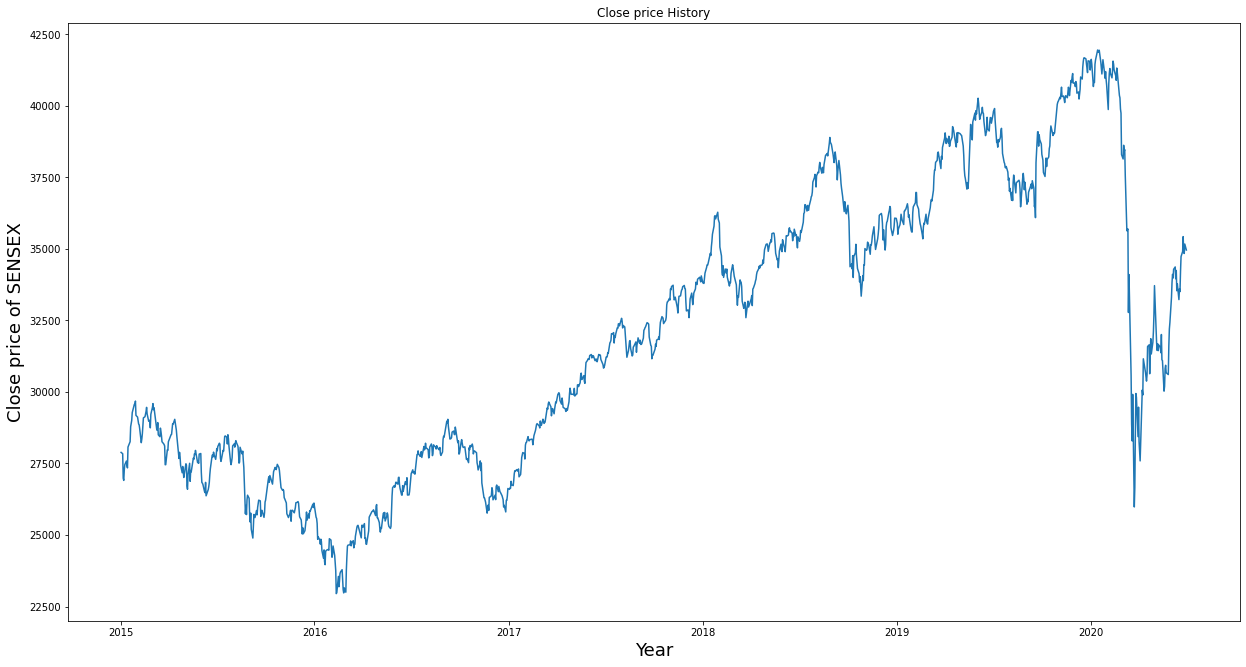

In [14]:
# Visualize the closing price index
plt.figure(figsize=(21,11))
plt.title('Close price History')
plt.plot(stock_df['Close'],)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close price of SENSEX', fontsize=18)
plt.show()

In [15]:
result = pd.DataFrame(stock_df)
# Get the values of change in stock price in a single day
result['label'] = stock_df['Close'].values - stock_df['Open'].values
# result = pd.DataFrame(result)

In [16]:
# store the value in our stock_df datasets
stock_df['Label'] = result['label'].values
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,label,Label
Date,,,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0,366.621094,366.621094
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0,-136.109375,-136.109375
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0,-706.769531,-706.769531
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0,-74.609375,-74.609375
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0,95.941407,95.941407


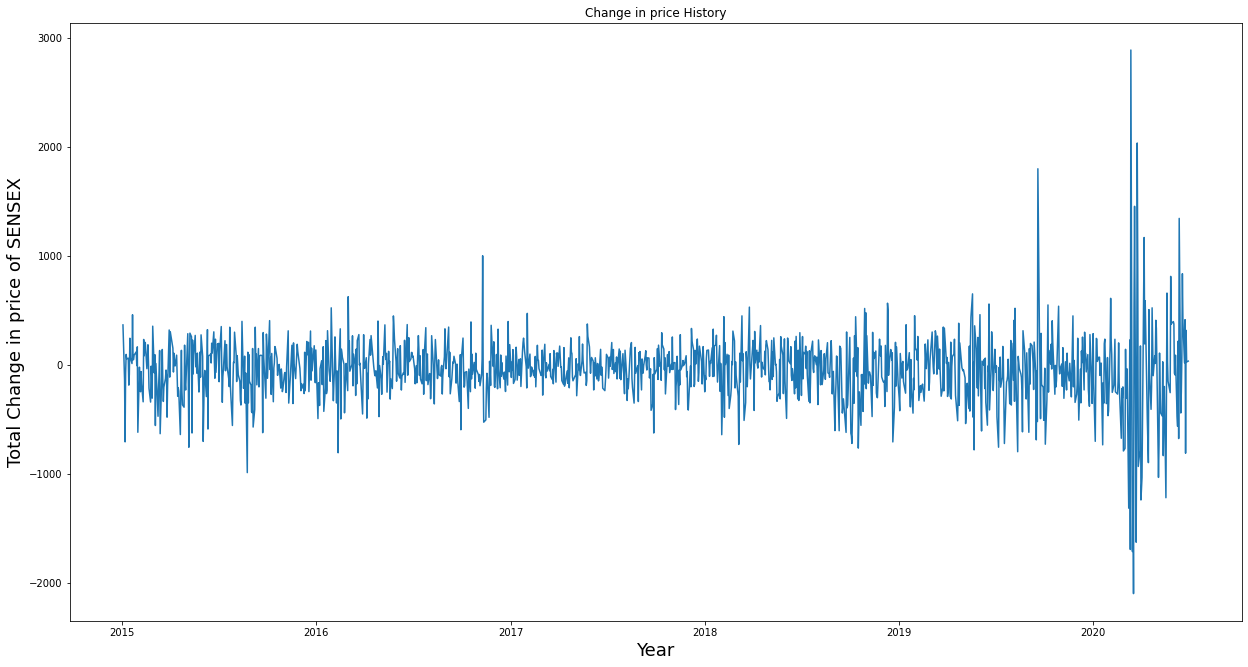

In [17]:
# Visualize the total up and down in price index
plt.figure(figsize=(21,11))
plt.title('Change in price History')
plt.plot(stock_df['Label'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Change in price of SENSEX', fontsize=18)
plt.show()

In [26]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [28]:
# Import all libraries for neuralnetwork
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
# take the close column only
df=stock_df.reset_index()['Close']
df.head()

0    27887.900391
1    27842.320313
2    26987.460938
3    26908.820313
4    27274.710938
Name: Close, dtype: float64

In [33]:
# normalize the data between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [34]:
# splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [35]:
# Shape of training and testing data
training_size,test_size

(874, 471)

In [36]:
# train_data

In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
  
	return np.array(dataX), np.array(dataY)

In [38]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
# shape of train dataset
print(X_train.shape), print(y_train.shape)

(773, 100)
(773,)


(None, None)

In [40]:
# Shape of test dataset
print(X_test.shape), print(ytest.shape)

(370, 100)
(370,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Built the model for LSTM

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
# model.summary()

In [ ]:
# Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
13/13 [==============================] - 3s 243ms/step - loss: 0.0253 - val_loss: 0.0762
Epoch 2/10
13/13 [==============================] - 2s 177ms/step - loss: 0.0059 - val_loss: 0.0191
Epoch 3/10
13/13 [==============================] - 2s 191ms/step - loss: 0.0024 - val_loss: 0.0097
Epoch 4/10
13/13 [==============================] - 2s 179ms/step - loss: 0.0014 - val_loss: 0.0097
Epoch 5/10
13/13 [==============================] - 2s 176ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 6/10
13/13 [==============================] - 2s 188ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 7/10
13/13 [==============================] - 2s 177ms/step - loss: 0.0012 - val_loss: 0.0085
Epoch 8/10
13/13 [==============================] - 2s 178ms/step - loss: 0.0012 - val_loss: 0.0084
Epoch 9/10
13/13 [==============================] - 2s 178ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 10/10
 5/13 [==========>...................] - ETA: 1s - loss: 0.0012

In [124]:
X_train[0][0][0]

0.25978225219279216

# Predict the test data and check accuracy

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
train_predict[10]
# train = pd.DataFrame(train_predict)
# X_train[10]

array([27304.121], dtype=float32)

In [50]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29669.679308135754

In [51]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

37736.54538918256

We can apply different optimization techinque to increase the performance of the model.

## Plot the prediction

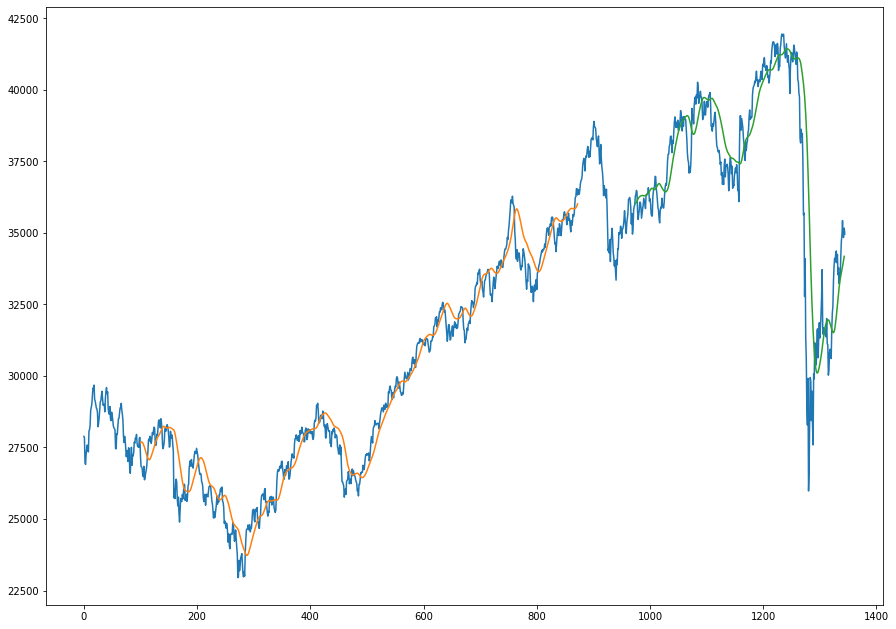

In [125]:
### Plotting 
plt.figure(figsize=(15,11))
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predict the future 30 days and plot the output

In [53]:
len(test_data)

471

In [66]:
x_input=test_data[371:].reshape(1,-1) # We are taking last 100 days record i.e., from 471 to 371
x_input.shape

(1, 100)

In [55]:
# Take all the values in a list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()  

In [56]:
temp_input[10]

0.9740621514147216

**Logic to predict the next days Stocks price**

In [57]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
# Predict the next 30 days
while(i<30):
    
    if(len(temp_input)>100): # Shifting our data 1 position fiorward
        print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.60395855]
101
[0.9453281621260476, 0.9353111079104361, 0.8905140604439015, 0.9387788897440559, 0.9573718580291262, 0.9659699751650885, 0.9573293022920057, 0.9487912155268887, 0.961239088542178, 0.9796466205710201, 0.9740621514147216, 0.9634283468137141, 0.9527947478356409, 0.944304973197204, 0.9668630297231418, 0.9588171097918856, 0.916350967588909, 0.912033714891137, 0.891390462754706, 0.8838486334191509, 0.8076217807425334, 0.7995553024124677, 0.8248005403807332, 0.8135263433356954, 0.8167435189162249, 0.7696934822786812, 0.667504522089349, 0.6707911849062811, 0.5171524963739804, 0.5869042923904169, 0.44409923558399145, 0.4014178474833543, 0.31144373147509885, 0.2808513704769171, 0.36651779343811075, 0.1594359365320892, 0.1958969858422419, 0.2938797084031737, 0.3681392301618449, 0.3612353263740371, 0.28885576257520507, 0.34296769388437, 0.27964510950823507, 0.24415390021201056, 0.3744779850789546, 0.36535994738126076, 0.43197073645687056, 0.4072560066051978, 0.39092990438138675, 0

In [58]:
print(len(lst_output))

30


In [59]:
day_new=np.arange(1,101)  # 100 records for the new
day_pred=np.arange(101,131)  # 30 records for the prediction

In [60]:
len(df)

1345

In [61]:
# inverse the sacled data to a real value
scaler.inverse_transform(df[1158:]).shape
b = scaler.inverse_transform(df[1158:])
b= b.ravel()
b.shape

(187,)

Plot the predictions.

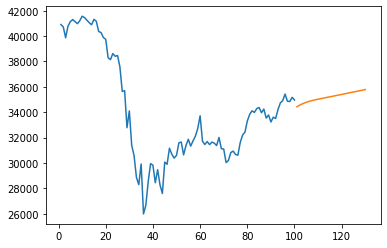

In [62]:
plt.plot(day_new,scaler.inverse_transform(df[1245:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

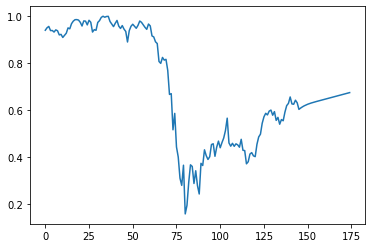

In [63]:
# We add the lst 30 days prediction value and then plot it
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

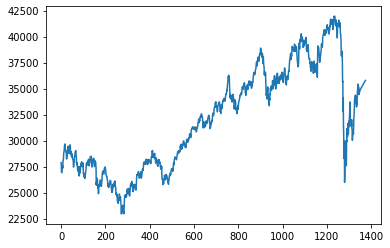

In [64]:
df4=scaler.inverse_transform(df3).tolist()
plt.plot(df4)

In the Project i have used many different sources and we can improve our model output by applying different optimization technique. I had a time boundation in this project but I will take it further and try to deploy it also after improving model accuracy.
**Thank you**